<a href="https://colab.research.google.com/github/cacress/CSC442/blob/main/Rithik_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA for Text Metrics Queries

In [2]:
import pandas as pd

### Import cleaned and prepared dataset
df = pd.read_csv('https://raw.githubusercontent.com/cacress/CSC442/refs/heads/rithik_eda/datasets/rithik_eda_dataset.csv')

In [3]:
### Add a simple neutrality measure that is extracted from sentiment scores.
### This will aid in regression analysis, since it is a closeness measure to 0 rather than in one of two opposite directions.
df['title_neutrality'] = 1 - df['title_sentiment'].abs()
df['description_neutrality'] = 1 - df['description_sentiment'].abs()

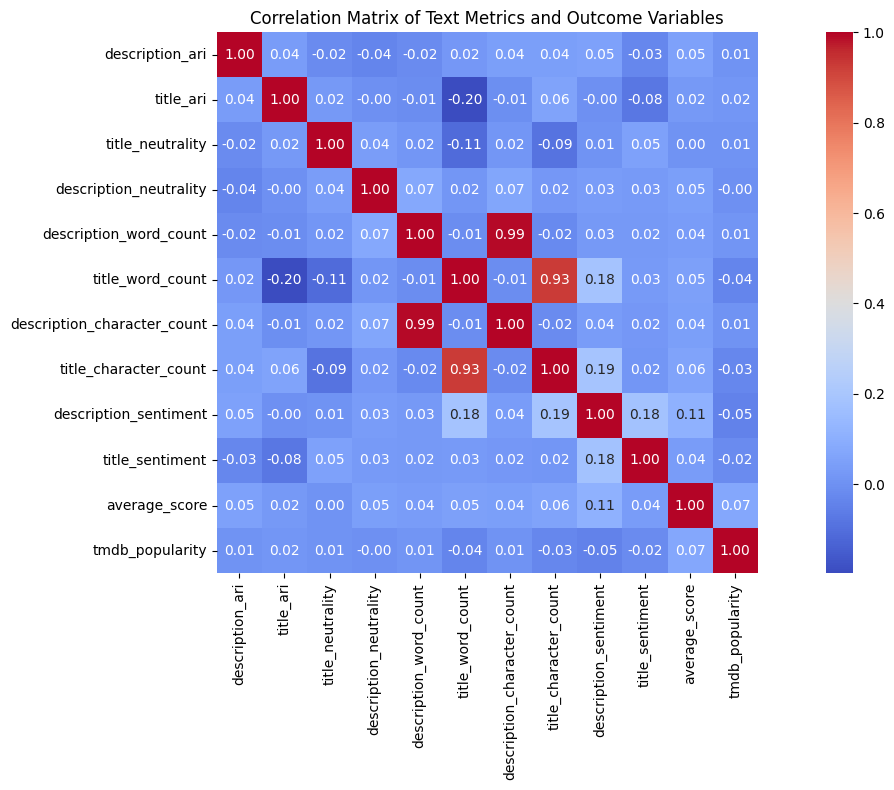

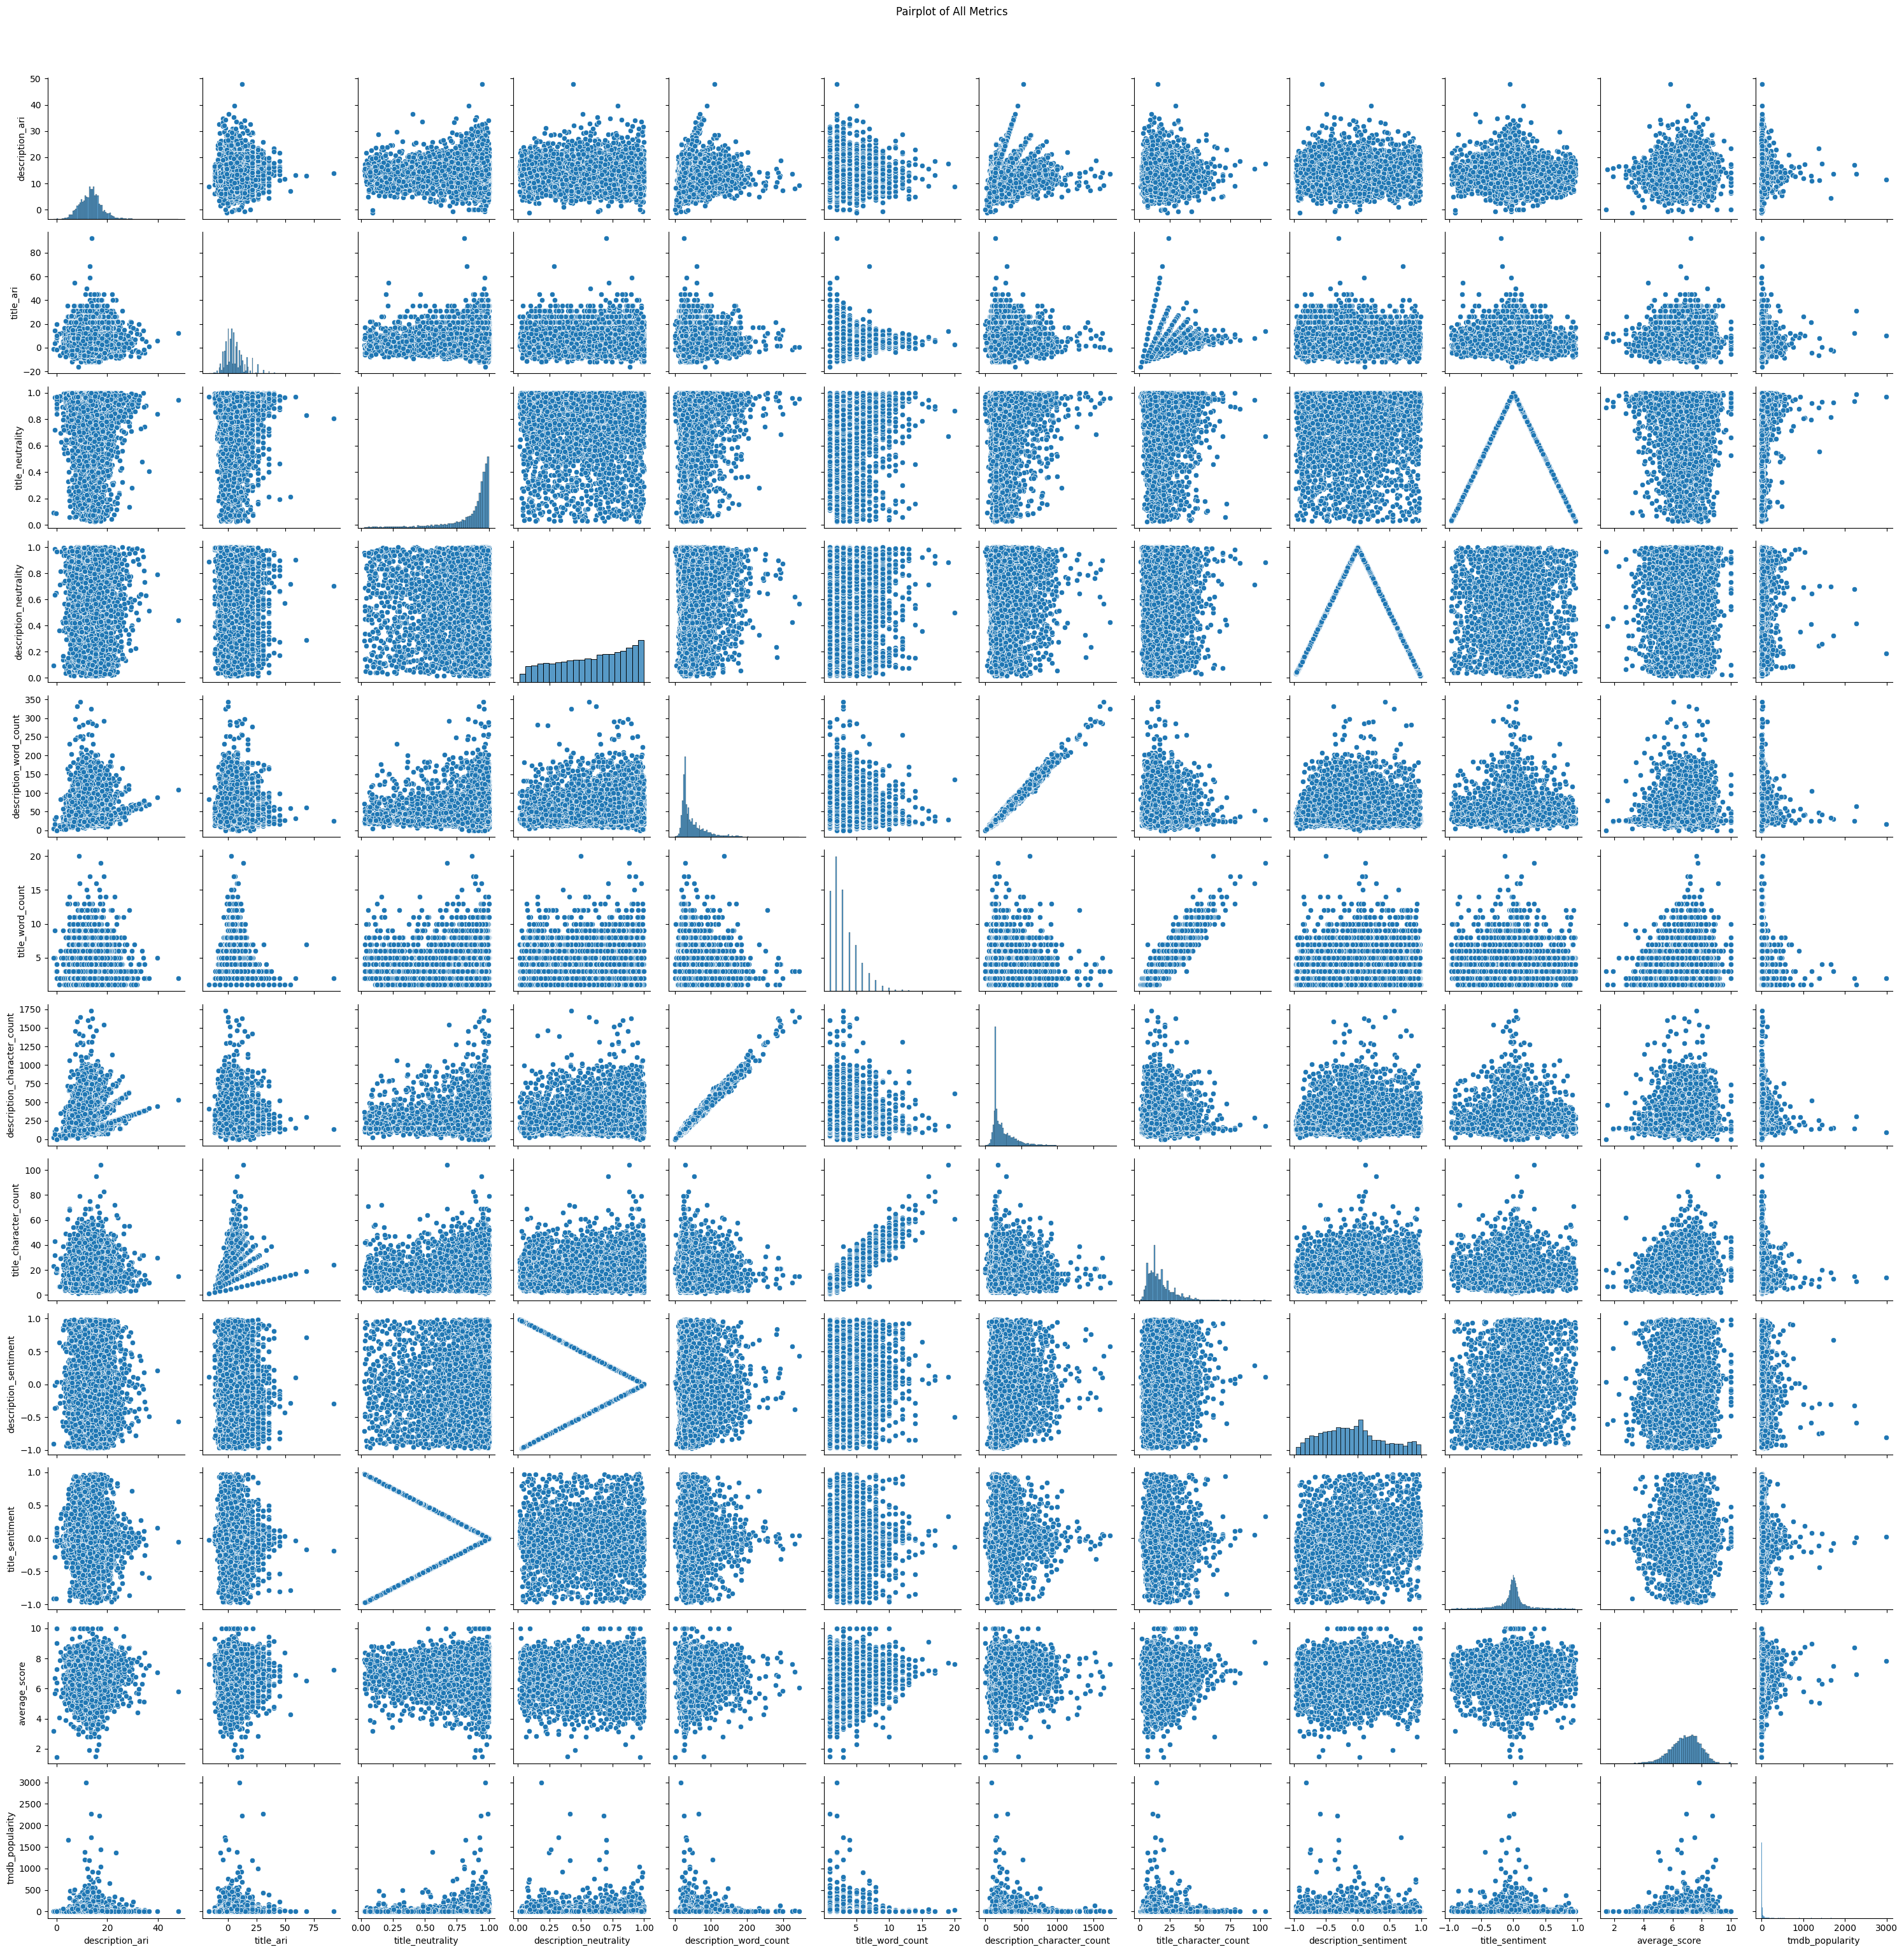

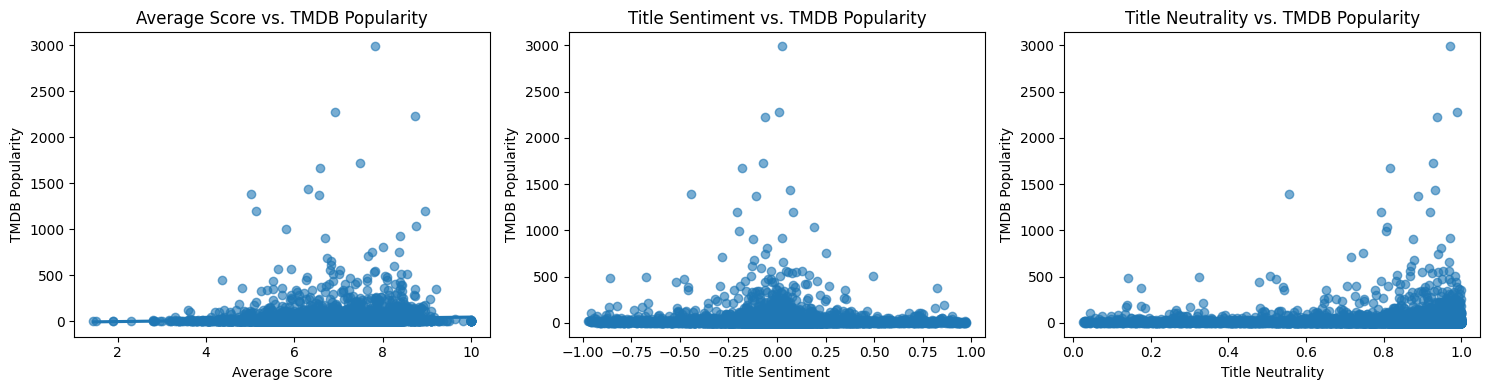

In [4]:
### Creating a heatmap of correlations and scatterplots for all pairs of variables of interest to get a better idea of relationships between variables.
import matplotlib.pyplot as plt
import seaborn as sns

# These are all the variables I want in the heatmap
numeric_cols = [
    'description_ari', 'title_ari',
    'title_neutrality', 'description_neutrality',
    'description_word_count', 'title_word_count',
    'description_character_count', 'title_character_count',
    'description_sentiment', 'title_sentiment',
    'average_score', 'tmdb_popularity'
]

# Creating a subset of the data with just the variables I want to look at
df_numeric = df[numeric_cols].dropna()

# Correlation Heatmap
plt.figure(figsize=(14, 8))
corr_matrix = df_numeric.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Text Metrics and Outcome Variables")
plt.tight_layout()
plt.show()

# Scatter Plots for every pair of variables
sns.pairplot(df_numeric)
plt.suptitle("Pairplot of All Metrics", y=1.02)
plt.tight_layout()
plt.show()

### Some other scatterplots I want a closer look at
# Organizing the plots into one simple figure grid
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Average Score vs. TMDB Popularity
sns.regplot(x='average_score', y='tmdb_popularity', data=df_numeric,
            scatter_kws={'alpha': 0.6}, ax=axes[0])
axes[0].set_title("Average Score vs. TMDB Popularity")
axes[0].set_xlabel("Average Score")
axes[0].set_ylabel("TMDB Popularity")

# Title Sentiment vs. TMDB Popularity
sns.regplot(x='title_sentiment', y='tmdb_popularity', data=df_numeric,
            scatter_kws={'alpha': 0.6}, ax=axes[1])
axes[1].set_title("Title Sentiment vs. TMDB Popularity")
axes[1].set_xlabel("Title Sentiment")
axes[1].set_ylabel("TMDB Popularity")

# Title Neutrality vs. TMDB Popularity
sns.regplot(x='title_neutrality', y='tmdb_popularity', data=df_numeric,
            scatter_kws={'alpha': 0.6}, ax=axes[2])
axes[2].set_title("Title Neutrality vs. TMDB Popularity")
axes[2].set_xlabel("Title Neutrality")
axes[2].set_ylabel("TMDB Popularity")

plt.tight_layout()
plt.show()

Multiple Threshold Analysis for TMDB Popularity vs. Title Neutrality

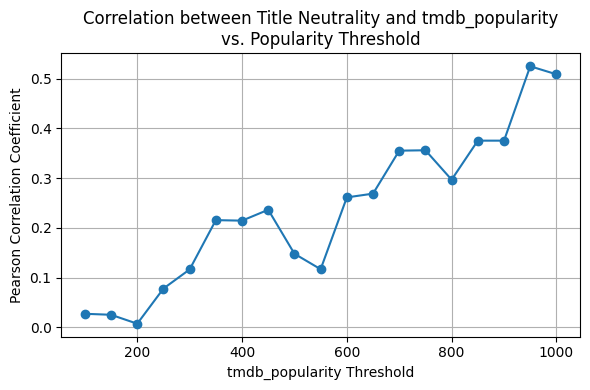

In [5]:
# All thresholds we want to look at
thresholds = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

# List to store the correlations that are assigned to each threshold
correlations = []

for thresh in thresholds:
    # Removing shows/movies that do not meet the current popularity threshold
    df_filtered = df[df['tmdb_popularity'] >= thresh]

    # If this threshold yields us a subset of less than 10 observations, we'll ignore completely (this shouldn't matter)
    if df_filtered.shape[0] < 10:
        continue

    # Calculate correlation between title_neutrality and tmdb_popularity
    corr_val = df_filtered['title_neutrality'].corr(df_filtered['tmdb_popularity'])
    correlations.append((thresh, corr_val))

# Convert the correlation list into two lists for plotting the correlation vs. threshold
threshold_vals = [t for t, corr in correlations]
corr_vals = [corr for t, corr in correlations]

# Plot correlation as a function of the tmdb_popularity threshold
plt.figure(figsize=(6, 4))
plt.plot(threshold_vals, corr_vals, marker='o')
plt.title("Correlation between Title Neutrality and tmdb_popularity\nvs. Popularity Threshold")
plt.xlabel("tmdb_popularity Threshold")
plt.ylabel("Pearson Correlation Coefficient")
plt.grid(True)
plt.tight_layout()
plt.show()

Multiple Threshold Analysis for 4 more relationships:

1) Title Word Count vs TMDB Popularity

2) Title Word Count vs Critic Score

3) Title Readability vs TMDB Popularity

4) Description Readability vs TMDB Popularity

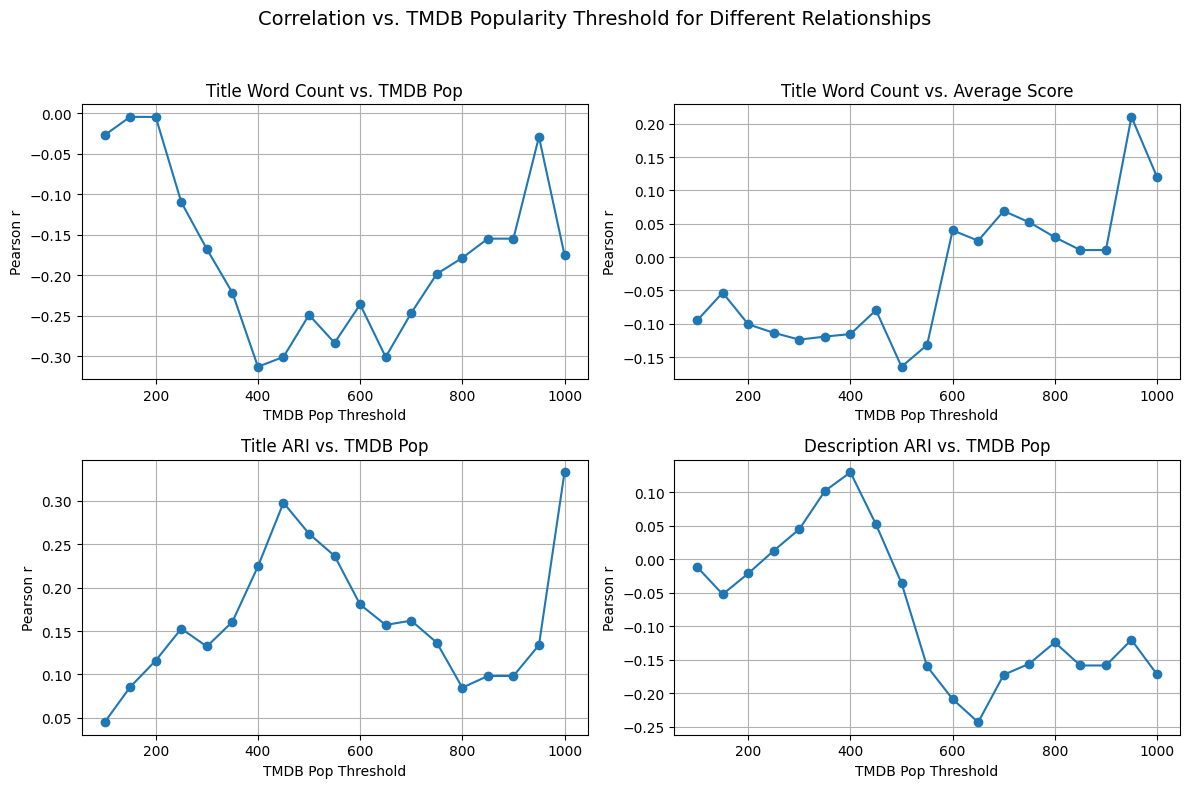

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# All thresholds we want to look at
thresholds = [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]

# Lists to store the correlations that are assigned to each threshold
title_word_tmdb_corr = []
title_word_avg_corr = []
title_ari_tmdb_corr = []
desc_ari_tmdb_corr = []

# Threshold for how many samples are "too few" to effectively make any inference
min_samples = 10

### title_word_count vs. tmdb_popularity
for thresh in thresholds:
    df_filtered = df[df['tmdb_popularity'] >= thresh]
    if df_filtered.shape[0] < min_samples:
        continue
    corr_val = df_filtered['title_word_count'].corr(df_filtered['tmdb_popularity'])
    title_word_tmdb_corr.append((thresh, corr_val))

### title_word_count vs. average_score
for thresh in thresholds:
    df_filtered = df[df['tmdb_popularity'] >= thresh]
    if df_filtered.shape[0] < min_samples:
        continue
    corr_val = df_filtered['title_word_count'].corr(df_filtered['average_score'])
    title_word_avg_corr.append((thresh, corr_val))

### title_ari vs. tmdb_popularity
for thresh in thresholds:
    df_filtered = df[df['tmdb_popularity'] >= thresh]
    if df_filtered.shape[0] < min_samples:
        continue
    corr_val = df_filtered['title_ari'].corr(df_filtered['tmdb_popularity'])
    title_ari_tmdb_corr.append((thresh, corr_val))

### description_ari vs. tmdb_popularity
for thresh in thresholds:
    df_filtered = df[df['tmdb_popularity'] >= thresh]
    if df_filtered.shape[0] < min_samples:
        continue
    corr_val = df_filtered['description_ari'].corr(df_filtered['tmdb_popularity'])
    desc_ari_tmdb_corr.append((thresh, corr_val))

##### All plots: correlation vs. tmdb_popularity threshold for each relationship
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

### Title Word Count vs. TMDB Popularity
if title_word_tmdb_corr:
    thresh_vals, corr_vals = zip(*title_word_tmdb_corr)
    axes[0, 0].plot(thresh_vals, corr_vals, marker='o', linestyle='-')
    axes[0, 0].set_title("Title Word Count vs. TMDB Pop")
    axes[0, 0].set_xlabel("TMDB Pop Threshold")
    axes[0, 0].set_ylabel("Pearson r")
    axes[0, 0].grid(True)

### Title Word Count vs. Average Score
if title_word_avg_corr:
    thresh_vals, corr_vals = zip(*title_word_avg_corr)
    axes[0, 1].plot(thresh_vals, corr_vals, marker='o', linestyle='-')
    axes[0, 1].set_title("Title Word Count vs. Average Score")
    axes[0, 1].set_xlabel("TMDB Pop Threshold")
    axes[0, 1].set_ylabel("Pearson r")
    axes[0, 1].grid(True)

### Title ARI vs. TMDB Popularity
if title_ari_tmdb_corr:
    thresh_vals, corr_vals = zip(*title_ari_tmdb_corr)
    axes[1, 0].plot(thresh_vals, corr_vals, marker='o', linestyle='-')
    axes[1, 0].set_title("Title ARI vs. TMDB Pop")
    axes[1, 0].set_xlabel("TMDB Pop Threshold")
    axes[1, 0].set_ylabel("Pearson r")
    axes[1, 0].grid(True)

### Description ARI vs. TMDB Popularity
if desc_ari_tmdb_corr:
    thresh_vals, corr_vals = zip(*desc_ari_tmdb_corr)
    axes[1, 1].plot(thresh_vals, corr_vals, marker='o', linestyle='-')
    axes[1, 1].set_title("Description ARI vs. TMDB Pop")
    axes[1, 1].set_xlabel("TMDB Pop Threshold")
    axes[1, 1].set_ylabel("Pearson r")
    axes[1, 1].grid(True)

plt.suptitle("Correlation vs. TMDB Popularity Threshold for Different Relationships", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Principal Component Analysis and t-SNE Clustering for various text metric features

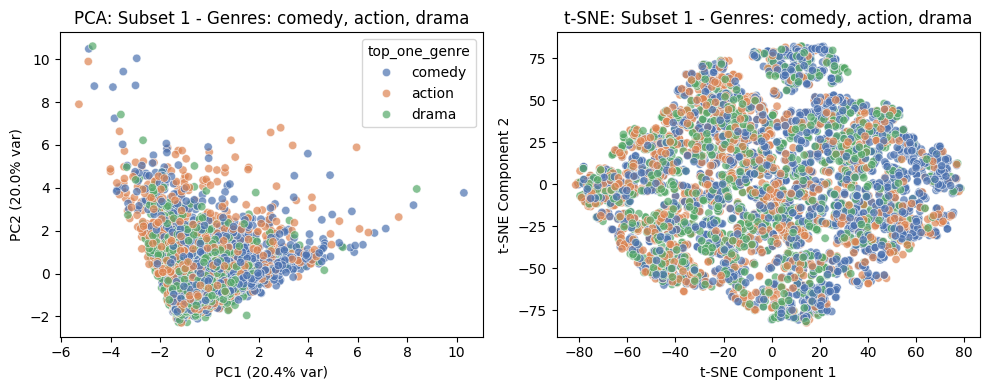

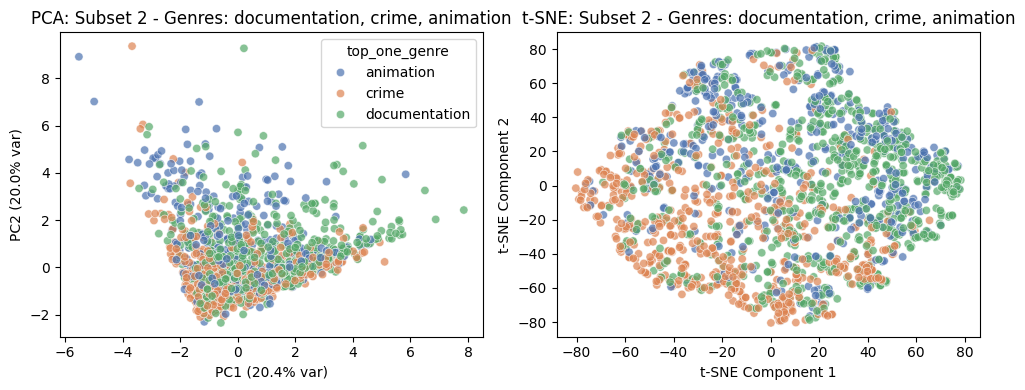

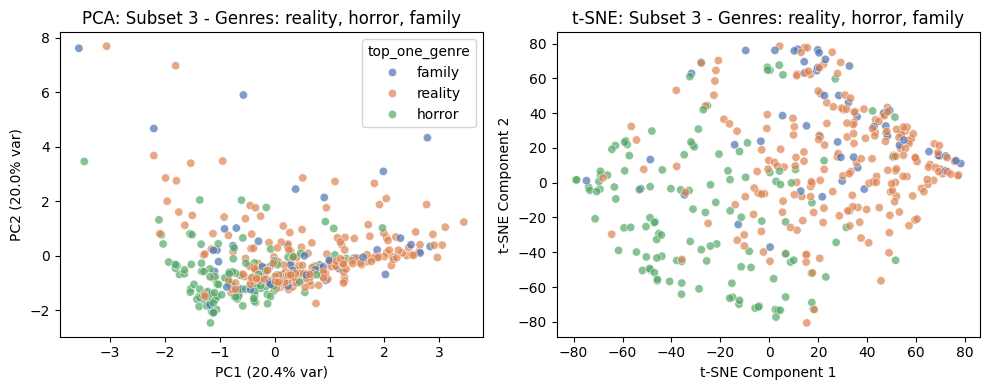

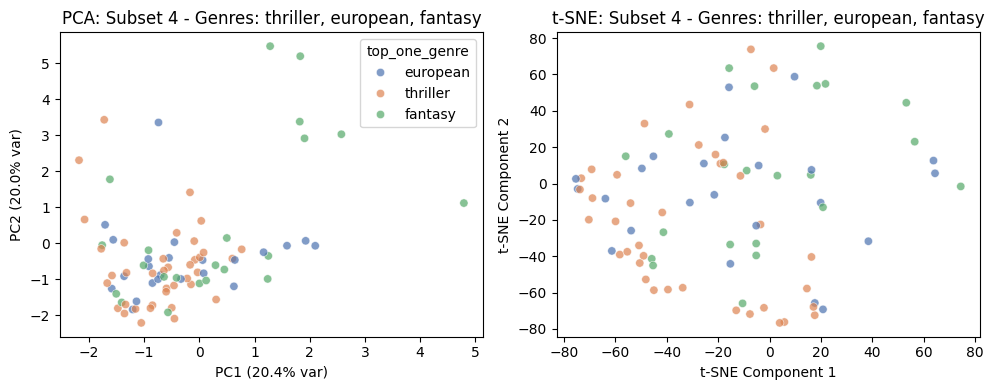

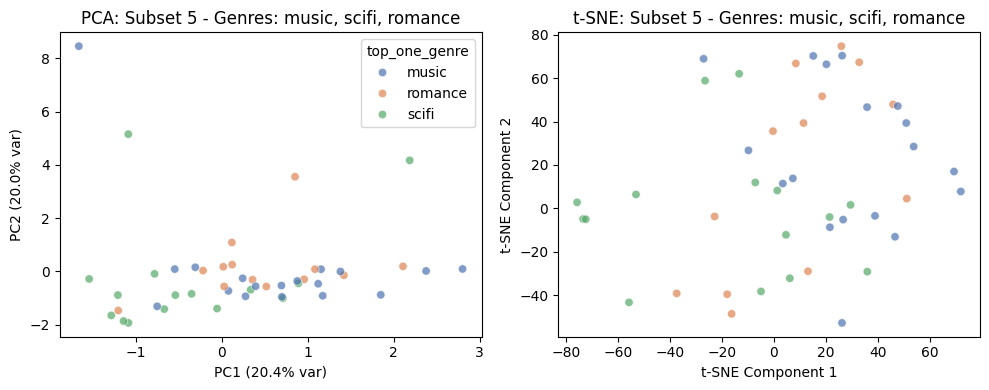

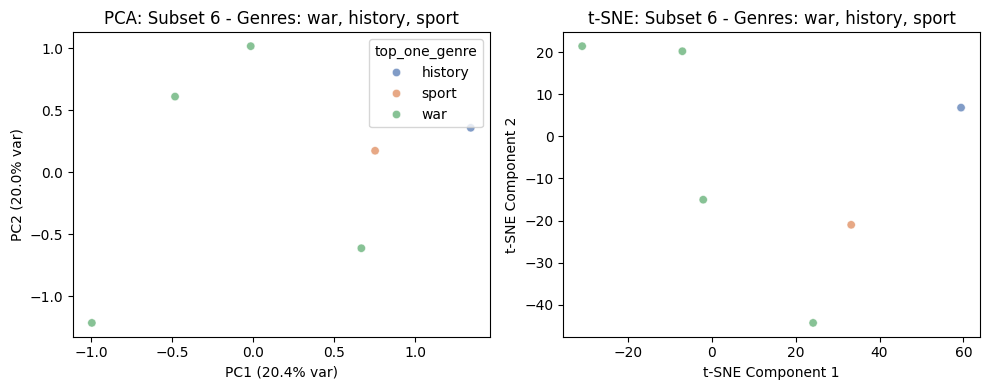

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Metrics to analyze
features = [
    'description_sentiment', 'title_sentiment',
    'description_neutrality', 'title_neutrality',
    'description_ari', 'title_ari',
    # I've excluded the word and character counts of titles/descriptions for this analysis
    # I did this because I want to focus on metrics that are not obvious at first glance, such as how long a title is
    # Additionally, word and character counts are highly correlated to each other, which may confound our t-SNE inferences
]

# Dropping empty genres and standardizing data
data = df[features + ['top_one_genre']].dropna()
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# ----- PCA -----
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
explained_variance = pca.explained_variance_ratio_
pc1_label = f"PC1 ({explained_variance[0]*100:.1f}% var)"
pc2_label = f"PC2 ({explained_variance[1]*100:.1f}% var)"
data['pca1'] = data_pca[:, 0]
data['pca2'] = data_pca[:, 1]

# ----- t-SNE -----
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)
data['tsne1'] = data_tsne[:, 0]
data['tsne2'] = data_tsne[:, 1]

# Get the top 18 most frequent genres from top_one_genre and reorganize them into six subsets (3 per group)
genre_counts = data['top_one_genre'].value_counts()
top_genres = list(genre_counts.head(18).index)

# Take a subset of the data that only includes these top 18 genres
data_top = data[data['top_one_genre'].isin(top_genres)]

# Split into six further subsets
genre_groups = [top_genres[i:i+3] for i in range(0, len(top_genres), 3)]

# PCA and t-SNE plots
for idx, group in enumerate(genre_groups):
    subset_data = data_top[data_top['top_one_genre'].isin(group)]
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # PCA plot
    sns.scatterplot(data=subset_data, x='pca1', y='pca2', hue='top_one_genre',
                    palette="deep", alpha=0.7, ax=axes[0])
    axes[0].set_title(f"PCA: Subset {idx+1} - Genres: {', '.join(group)}")
    axes[0].set_xlabel(pc1_label)
    axes[0].set_ylabel(pc2_label)

    # t-SNE plot
    sns.scatterplot(data=subset_data, x='tsne1', y='tsne2', hue='top_one_genre',
                    palette="deep", alpha=0.7, ax=axes[1])
    axes[1].set_title(f"t-SNE: Subset {idx+1} - Genres: {', '.join(group)}")
    axes[1].set_xlabel("t-SNE Component 1")
    axes[1].set_ylabel("t-SNE Component 2")

    # Cleaner plot legend
    axes[1].legend_.remove() if axes[1].get_legend() is not None else None

    plt.tight_layout()
    plt.show()
